In [1]:
plt = plotter()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import jax
import jax.numpy as np
import optax

In [3]:
import rl_simple as rls

In [32]:
θp, θv = rls.solve_iterate(R=1000)
θp, θv

(DeviceArray([ 0.03490809,  0.4719497 , -0.0145127 ], dtype=float32),
 DeviceArray([ 0.5631813 , -0.01614266, -0.7907231 ], dtype=float32))

In [33]:
pgrad = rls.grad_policy_obj(θp, θv)
vgrad = rls.grad_value_obj(θp, θv)
pgrad, vgrad

(DeviceArray([-0.03869752, -0.00019201,  0.01518156], dtype=float32),
 DeviceArray([0.00109091, 0.00548006, 0.00090064], dtype=float32))

In [34]:
poly = rls.pol_vec(rls.xgrid, θp)
value = rls.val_vec(rls.xgrid, θv)
valuep = rls.eval_policy_vec(rls.xgrid, θp, θv)

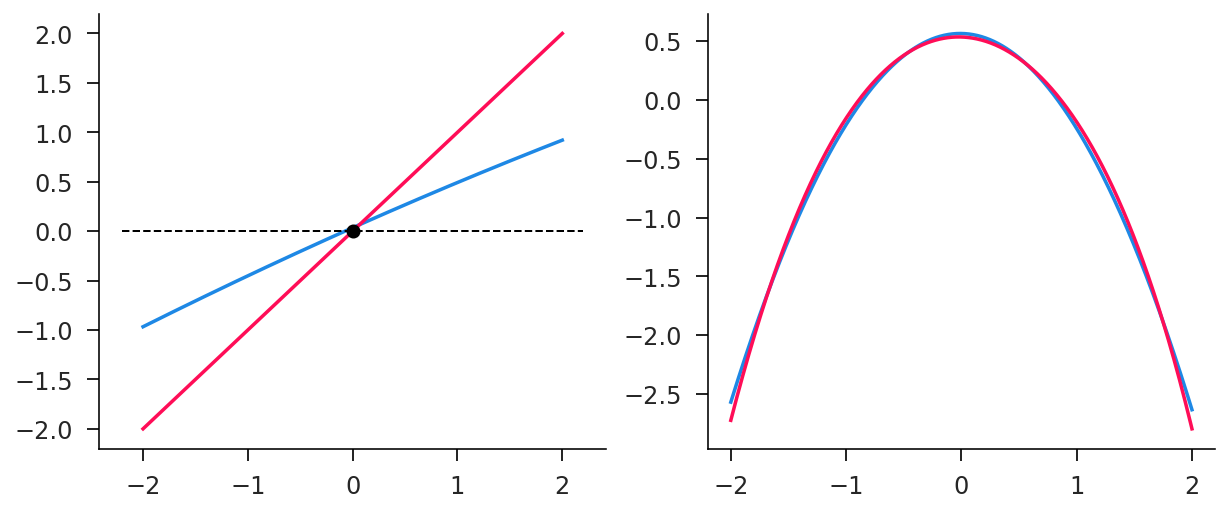

In [35]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(rls.xgrid, poly, rls.xgrid, rls.xgrid)
ax1.plot(rls.xgrid, value, rls.xgrid, valuep)
ax0.hlines(0, *ax0.get_xlim(), color='k', linestyle='--', linewidth=1)
ax0.scatter(0, 0, color='k', zorder=10);